# Reading data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [4]:
data = pd.read_csv("../data/Emotion_Data_v2.csv")

In [5]:
emotions = {'neutral': 0,
            'calm': 1,
            'happy': 2, 
            'sad': 3, 
            'angry': 4, 
            'fearful': 5, 
            'disgust': 6,
            'surprised': 7, 
            'boredom': 8}
data["Emotion"] = data["Emotion"].map(emotions)
names = data["File Name"]
data = data.drop("File Name", axis = 1)
data

,Emotion,Chroma Standard Deviation,Croma Mean,MEL Standard Deviation,MEL Mean,Spectral Centroid Feature,MFCC Standard Deviation,MFCC Mean,MFCC 1st Derivative,MFCC 2nd Derivative,Root Mean Square Mean,Spectral Rolloff Mean,Spectral Rolloff Range,Zero Crossing Rate
0,2,0.251560,0.611641,10.345727,1.482626,1851.787049,95.586288,-14.091299,0.045822,-0.102562,0.064489,327.987448,2691.650391,327.987448
1,0,0.235453,0.638080,23.354847,3.512083,1386.832519,96.253471,-9.005164,-0.040387,-0.095998,0.099006,277.470703,2777.783203,277.470703
2,4,0.244518,0.609958,23.899830,3.042638,2138.843511,83.991272,-17.577866,0.127689,-0.089570,0.101291,481.971571,2670.117188,481.971571
3,2,0.284806,0.528645,33.872307,3.438237,2073.102010,84.644112,-17.824776,-0.116098,-0.096451,0.098398,306.538759,2002.587891,306.538759
4,0,0.224481,0.658214,39.342068,5.511982,1481.499672,91.639870,-8.317816,-0.101314,-0.093935,0.126057,169.360352,1668.823242,169.360352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,7,0.332678,0.575813,0.364735,0.036160,2347.294889,167.522430,-51.517506,0.000119,-0.000630,0.007563,457.910156,4188.208008,457.910156
9892,7,0.325352,0.600506,0.889120,0.086041,2271.545838,156.242050,-45.163898,-0.000215,-0.000014,0.011557,429.840734,1733.422852,429.840734
9893,7,0.336933,0.577079,0.594145,0.058880,2275.967828,158.319168,-46.462028,-0.000471,-0.000133,0.009970,430.476273,1485.791016,430.476273
9894,7,0.310050,0.576939,0.937817,0.086885,2393.131729,147.918533,-40.915497,-0.001676,0.001688,0.013326,592.366229,6018.530273,592.366229


In [6]:
y = data["Emotion"]
data = data.drop("Emotion", axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6927, 13), (2969, 13), (6927,), (2969,))

#### Judging by the TSNE Random Forest and Logistic Regression may work nice. Also, let's check KNN

## KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors = 103, n_jobs = -1)
# params = {
#     "n_neighbors": np.arange(15, 151, 2)
# }
# knn = GridSearchCV(knn, params, n_jobs = -1, verbose = 3)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

In [11]:
# knn.best_params_

In [12]:
accuracy_score(knn.predict(X_test), y_test)

0.324014819804648

##### Not bad for KNN, but think that other models will work better

## Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators = 201, oob_score = True, n_jobs = -1, random_state = 11, \
                            max_depth = 15, verbose = 3)
# params = {
#     "n_estimators": [101, 201, 301],
#     "max_depth": np.arange(12, 20),
#     "min_samples_split": np.arange(5, 9)
#     "min_samples_leaf": np.arange(3, 7),
# }
# 
# rf = GridSearchCV(rf, params, n_jobs = -1, verbose = 3)

In [14]:
cross_val_score(rf, X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

array([0.44155844, 0.43795094, 0.42815884, 0.42310469, 0.43104693])

In [15]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 201building tree 2 of 201building tree 3 of 201

building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201building tree 8 of 201


building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201building tree 15 of 201

building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201building tree 22 of 201

building tree 23 of 201building tree 24 of 201

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s




building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201building tree 39 of 201

building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201
building tree 44 of 201
building tree 45 of 201
building tree 46 of 201building tree 47 of 201

building tree 48 of 201
building tree 49 of 201
building tree 50 of 201
building tree 51 of 201
building tree 52 of 201
building tree 53 of 201
building tree 54 of 201
building tree 55 of 201
building tree 56 of 201
building tree 57 of 201
building tree 58 of 201
building tree 59 of 201
building tree 60 of 201
building tree 61 of 201
building tree 62 of 201
building tree 63 of 201
building tree 64 of 201
building tree 65 of 201
building tree 

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.0s



building tree 135 of 201
building tree 136 of 201
building tree 137 of 201
building tree 138 of 201
building tree 139 of 201
building tree 140 of 201
building tree 141 of 201
building tree 142 of 201building tree 143 of 201

building tree 144 of 201
building tree 145 of 201building tree 146 of 201

building tree 147 of 201
building tree 148 of 201
building tree 149 of 201
building tree 150 of 201
building tree 151 of 201
building tree 152 of 201building tree 153 of 201

building tree 154 of 201building tree 155 of 201

building tree 156 of 201
building tree 157 of 201
building tree 158 of 201
building tree 159 of 201
building tree 160 of 201building tree 161 of 201

building tree 162 of 201
building tree 163 of 201
building tree 164 of 201
building tree 165 of 201
building tree 166 of 201
building tree 167 of 201
building tree 168 of 201
building tree 169 of 201
building tree 170 of 201
building tree 171 of 201
building tree 172 of 201
building tree 173 of 201
building tree 174 of 201

[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=201,
                       n_jobs=-1, oob_score=True, random_state=11, verbose=3,
                       warm_start=False)

In [16]:
np.arange(5, 12)

array([ 5,  6,  7,  8,  9, 10, 11])

In [17]:
# rf.best_params_

In [18]:
accuracy_score(rf.predict(X_test), y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.1s finished


0.42371168743684745

In [19]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": rf.feature_importances_}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
3,MEL Mean,0.095529
6,MFCC Mean,0.090560
5,MFCC Standard Deviation,0.087642
9,Root Mean Square Mean,0.084563
2,MEL Standard Deviation,0.079429
11,Spectral Rolloff Range,0.078324
10,Spectral Rolloff Mean,0.074917
12,Zero Crossing Rate,0.074469
0,Chroma Standard Deviation,0.072920
4,Spectral Centroid Feature,0.070018


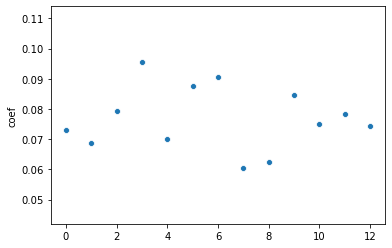

In [20]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### We see kinda uniform distribution, but all coefs are near to 0. That's nice, but accuracy is not the best

## Logistic Regression without scaling

In [21]:
logit = LogisticRegressionCV(Cs = [10, 5, 1, 0.1, 0.01, 0.001], class_weight = "balanced", \
                             random_state = 11, verbose = 3, n_jobs = -1)

In [22]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=[10, 5, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=11, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=3)

In [23]:
logit.C_

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

In [24]:
accuracy_score(logit.predict(X_test), y_test)

0.3361401145166723

In [25]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_[0]}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
6,MFCC Mean,0.062859
5,MFCC Standard Deviation,0.029816
3,MEL Mean,0.001641
1,Croma Mean,0.000810
0,Chroma Standard Deviation,0.000565
11,Spectral Rolloff Range,0.000207
9,Root Mean Square Mean,0.000172
7,MFCC 1st Derivative,0.000051
8,MFCC 2nd Derivative,-0.000199
4,Spectral Centroid Feature,-0.000957


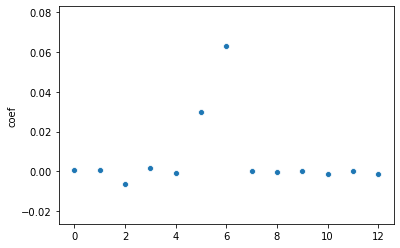

In [26]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### 0s. Need to use scaling

## Logistic Regression with scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# logit = LogisticRegressionCV(class_weight = "balanced", random_state = 11, verbose = 3, n_jobs = -1)
# params = {
#     "C": [10, 5, 1, 0.1, 0.01, 0.001]
# }
# logit = GridSearchCV(logit, params, n_jobs = -1, verbose = 3)

In [29]:
logit = LogisticRegressionCV(Cs = [10, 5, 1, 0.1, 0.01, 0.001], class_weight = "balanced", \
                             random_state = 11, verbose = 3, n_jobs = -1)
logit.fit(StandardScaler().fit_transform(X_train), y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=[10, 5, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=11, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=3)

In [30]:
accuracy_score(logit.predict(StandardScaler().fit_transform(X_test)), y_test)

0.3459077130346918

In [31]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_[0]}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
5,MFCC Standard Deviation,1.829206
6,MFCC Mean,1.239317
9,Root Mean Square Mean,1.237125
4,Spectral Centroid Feature,0.140820
11,Spectral Rolloff Range,0.137780
3,MEL Mean,0.020080
7,MFCC 1st Derivative,0.009880
0,Chroma Standard Deviation,-0.055189
10,Spectral Rolloff Mean,-0.160606
12,Zero Crossing Rate,-0.160606


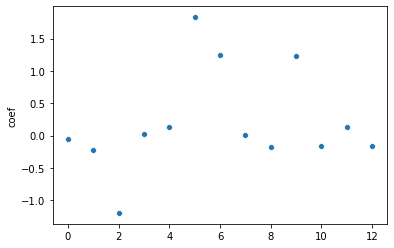

In [32]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### Feature importance is lower, better to use Random Forest

# MLP

In [33]:
# net = MLPClassifier(hidden_layer_sizes = tuple([50] * 10), alpha = 0.01, learning_rate = "constant", \
#                     random_state = 11, verbose = 10)
# params = {
#     "alpha": [0.0001, 0.001, 0.01, 0.1, 1]
# }

# net = GridSearchCV(net, params, n_jobs = -1, verbose = 10)

In [34]:
# net.fit(X_train, y_train)

In [35]:
# accuracy_score(net.predict(X_test), y_test)

In [36]:
# pd.DataFrame({"feature": X_train.columns,
#              "coef": np.mean(net.best_estimator_.coefs_[0])})

# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
svc = SVC(verbose = 5, random_state = 11)

params = {"C": np.arange(8.5, 9.5, 0.1)}

svc = GridSearchCV(svc, params, n_jobs = -1)

In [64]:
svc.fit(X_train_scaled, y_train)

[LibSVM]

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=11, shrinking=True,
                           tol=0.001, verbose=5),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
svc.best_params_

{'C': 8.899999999999999}

In [66]:
accuracy_score(svc.predict(X_test), y_test)

0.4061973728528124